In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
df = pd.read_csv("C:/capstone/skin/HAM10000_metadata.csv")
df.head(10)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


In [3]:
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

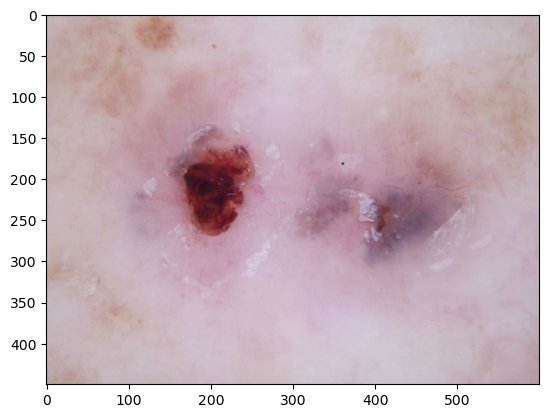

In [4]:
from PIL import Image
img = Image.open("C:/capstone/skin/HAM10000_images_part_1/ISIC_0025711.jpg")
plt.imshow(img)

In [5]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_ID_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

In [6]:
lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']
lesion_names_short = ['nv','mel','bkl','bcc','akiec','vasc','df']

# Maping the lesion type and ID to a dict.
df['lesion_type']=df['dx'].map(lesion_type_dict)
df['lesion_ID'] = df['dx'].map(lesion_ID_dict)

# Display the total found images.
print('Total number of images', len(df))
print('The problem is unbalanced, since Melanocytic nevi is much more frequent that other labels')

Total number of images 10015
The problem is unbalanced, since Melanocytic nevi is much more frequent that other labels


In [7]:
df['lesion_type'].value_counts()

lesion_type
Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: count, dtype: int64

In [8]:
fname_images = np.array(df['image_id'])
file_to_read ='C:/capstone/skin/HAM10000_images_part_1/'+str(fname_images[13])+'.jpg'

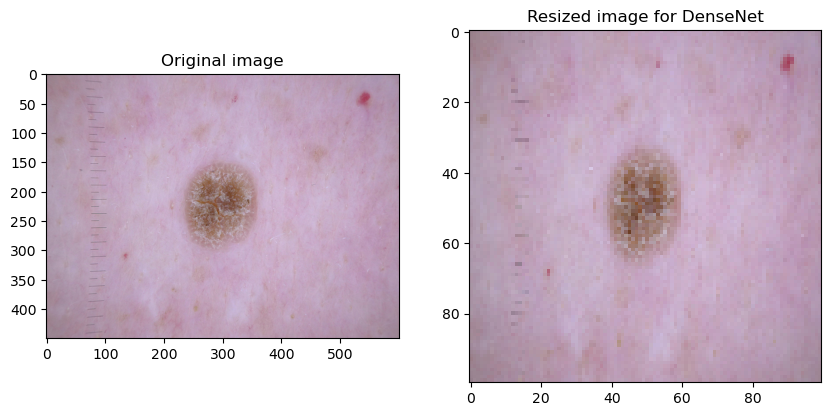

In [9]:

# Read the image
img = cv2.imread(file_to_read)

# Check if image is properly loaded
if img is None:
    print("Error: Unable to read the image.")
else:
    # Resize the image
    img2 = cv2.resize(img, (100, 100))

    # Show one example image before and after
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img[:, :, ::-1])
    plt.title('Original image')

    plt.subplot(1, 2, 2)
    plt.imshow(img2[:, :, ::-1])
    plt.title('Resized image for DenseNet')

    plt.show()


In [10]:
pip install --upgrade keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from tensorflow.keras.layers import Dropout, Activation, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense


In [12]:
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.utils import to_categorical
from cv2 import imread, resize



In [13]:
def produce_new_img(img2: cv2) -> tuple:
    imga = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
    imgb = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE)
    imgc = cv2.rotate(img2, cv2.ROTATE_180)
    imgd = cv2.flip(img2, 0)
    imge = cv2.flip(img2, 1)
    new_imges = imga, imgb, imgc, imgd ,imge
    return new_imges

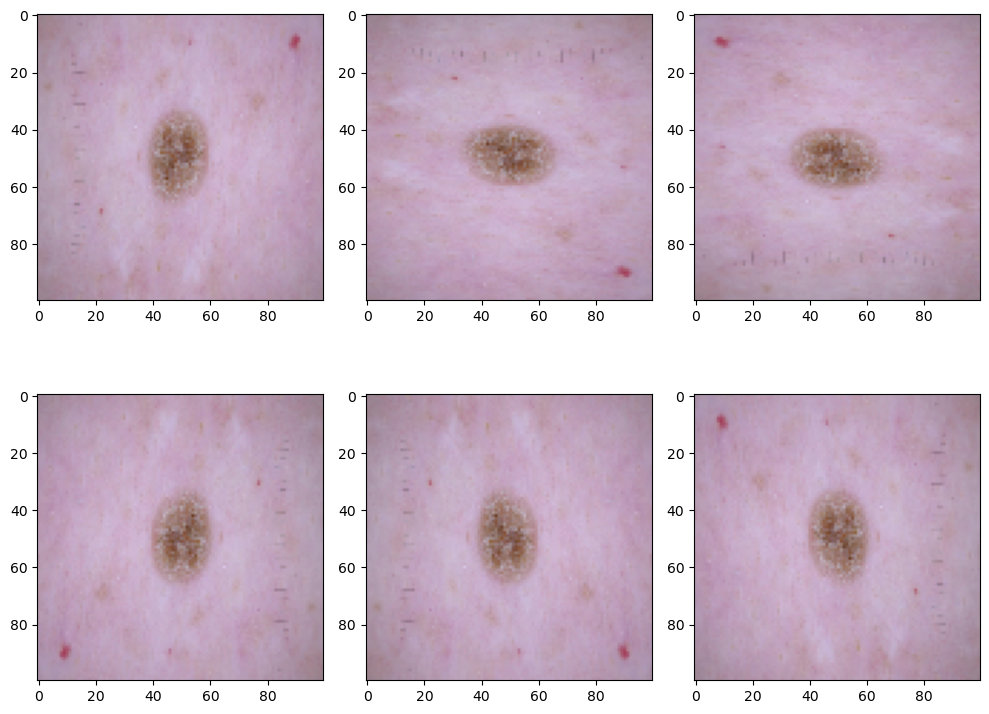

In [14]:
def show_example():
    plt.figure(figsize = (10, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(img2[:, :, ::-1])
    for i in range(5):
        plt.subplot(2, 3, 2+i)
        plt.imshow(new_img[i][:, :, ::-1])
    plt.tight_layout()
    plt.show()
new_img = produce_new_img(img2)

show_example()

In [15]:
import os
x = []
y = []

lista1 = os.listdir('C:/capstone/skin/HAM10000_images_part_1')
lista2 = os.listdir('C:/capstone/skin/HAM10000_images_part_2')

for i in range(len(lista1)):
    
    fname_image = lista1[i]
    fname_ID = fname_image.replace('.jpg', '')
    file_to_read ='C:/capstone/skin/HAM10000_images_part_1/' + str(fname_image) 
    img = imread(file_to_read)                                  
    img2 = resize(img,(100, 100))                               
    x.append(img2)
    output = np.array(df[df['image_id'] == fname_ID].lesion_ID)
    y.append(output[0])
    if output != 0:
        new_img = produce_new_img(img2)
        for i in range(5):
            x.append(new_img[i])
            y.append(output[0])
    if i % 100 == 0:
        print(i, 'images loaded')
for i in range(len(lista2)):

    fname_image = lista2[i]
    fname_ID = fname_image.replace('.jpg', '')
    file_to_read ='C:/capstone/skin/HAM10000_images_part_2/' + str(fname_image)


    img = imread(file_to_read)
    img2 = resize(img, (100, 100))
    x.append(img2)
   
    output = np.array(df[df['image_id'] == fname_ID].lesion_ID)
    y.append(output[0])
   
    if output != 0:
        new_img = produce_new_img(img2)
        for i in range(5):
            x.append(new_img[i])
            y.append(output[0])
    
    if i % 100 == 0:
        print(len(lista1) + i,'images loaded')

0 images loaded
100 images loaded
200 images loaded
300 images loaded
600 images loaded
700 images loaded
800 images loaded
900 images loaded
1000 images loaded
1100 images loaded
1200 images loaded
1400 images loaded
1500 images loaded
1700 images loaded
1731 images loaded
1931 images loaded
2131 images loaded
2231 images loaded
2331 images loaded


In [16]:
from sklearn.model_selection import train_test_split
from keras.models import Model
x = np.array(x)
y = np.array(y)

y_train = to_categorical(y, num_classes = 7)

X_train, X_test, y_train, y_test = train_test_split(x,                  
                                                    y_train,            
                                                    test_size = 0.20,   
                                                    random_state = 50,  
                                                    stratify = y)       

print('Train dataset shape', X_train.shape)
print('Test dataset shape', X_test.shape)

Train dataset shape (4935, 100, 100, 3)
Test dataset shape (1234, 100, 100, 3)


In [17]:
from sklearn.utils.class_weight import compute_class_weight
def est_class_weights(dis_id: np.array) -> dict:
    
    class_weights = np.around(compute_class_weight(class_weight = 'balanced', classes = np.unique(dis_id), y = y), 2)
    class_weights = dict(zip(np.unique(dis_id), class_weights))

y_id = np.array(df['lesion_ID'])
new_class_weights = est_class_weights(y_id)
print(new_class_weights)

None


In [18]:
from keras.models import Sequential, load_model
model = Sequential()
        

model.add(Conv2D(filters = 96,
                kernel_size = (11, 11),
                strides = (4, 4),
                activation = 'relu',
                input_shape = (100, 100, 3)))

model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))


model.add(Conv2D(filters = 256,
                kernel_size=(5, 5),
                strides=(1, 1),
                activation = 'relu',
                padding = "same"))

model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))


model.add(Conv2D(filters = 384,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 padding="valid"))



model.add(Conv2D(filters = 384,
                kernel_size = (1, 1), 
                strides = (1, 1), 
                activation = 'relu', 
                padding = "same"))



model.add(Conv2D(filters = 256, 
                kernel_size = (1, 1),
                strides = (1, 1),
                activation = 'relu',
                padding = "same"))


model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))
              
model.add(Flatten()) 

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.4))
              

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.4))
              
model.add(Dense(7, activation = 'softmax'))

C:\Users\Jensen Joseph\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

def mod_checkpoint_callback() -> None:
    trained_model = ModelCheckpoint(filepath='model.keras',  
                                    save_weights_only=False,     
                                    monitor='val_accuracy',      
                                    mode='auto',                 
                                    save_best_only=True,     
                                    verbose=1)
    return trained_model


In [20]:
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

early_stopping_monitor = EarlyStopping(patience = 35, monitor = 'val_accuracy')

model_checkpoint_callback = mod_checkpoint_callback()


optimizer = Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-3)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

datagen = ImageDataGenerator(zoom_range = 0.3, horizontal_flip = True, shear_range = 0.3)
datagen.fit(X_train)

batch_size = 32
epochs = 50


history = model.fit(datagen.flow(X_train,y_train),
                    epochs = epochs,
                    batch_size = batch_size,
                    shuffle = True,
                    callbacks = [early_stopping_monitor, model_checkpoint_callback],
                    validation_data = (X_test, y_test),
                    class_weight = new_class_weights
                )


Epoch 1/50


C:\Users\Jensen Joseph\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.3371 - loss: 1.9664
Epoch 1: val_accuracy improved from -inf to 0.44814, saving model to model.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 175ms/step - accuracy: 0.3375 - loss: 1.9644 - val_accuracy: 0.4481 - val_loss: 1.4517
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.4449 - loss: 1.4748
Epoch 2: val_accuracy improved from 0.44814 to 0.47650, saving model to model.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 27s 170ms/step - accuracy: 0.4450 - loss: 1.4745 - val_accuracy: 0.4765 - val_loss: 1.3894
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4533 - loss: 1.3930
Epoch 3: val_accuracy improved from 0.47650 to 0.51540, saving model to model.keras
155/155 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.4534 - loss: 1.3927 - val_accuracy: 0.5154 - val_loss: 1.2452
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.5040 - loss: 1.2842
Epoch 4: val_accuracy improved from 0.51540 to 0.5

In [30]:

import numpy as np


from keras.callbacks import CSVLogger

csv_logger = CSVLogger('new_log.csv', append=True, separator=';')
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)


In [31]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Accuracy: %.2f%%" % (scores[1] * 100))

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8201 - loss: 0.5347
Accuracy: 82.09%


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Flatten the input images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train the Random Forest classifier
rf_classifier.fit(X_train_flat, y_train)

# Evaluate the Random Forest classifier
rf_accuracy = rf_classifier.score(X_test_flat, y_test)
print("Random Forest Classifier Accuracy:", rf_accuracy)


Random Forest Classifier Accuracy: 0.3387358184764992


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Reshape the input images for KNN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train the KNN classifier
knn_classifier.fit(X_train_flat, y_train)

# Predict using the trained KNN classifier
knn_pred = knn_classifier.predict(X_test_flat)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Classifier Accuracy:", knn_accuracy)


KNN Classifier Accuracy: 0.5518638573743923


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Flatten the input images for regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the Linear Regression model
linear_regressor.fit(X_train_flat, y_train)

# Predict using the trained Linear Regression model
regression_pred = linear_regressor.predict(X_test_flat)

# Calculate the Mean Squared Error (MSE) for regression
regression_mse = mean_squared_error(y_test, regression_pred)
print("Linear Regression MSE:", regression_mse)


Linear Regression MSE: 0.1694577847509661


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=0)

# Train the Decision Tree classifier
decision_tree.fit(X_train_flat, y_train)

# Predict using the trained Decision Tree classifier
dt_pred = decision_tree.predict(X_test_flat)

# Calculate the accuracy of the Decision Tree classifier
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.47974068071312803


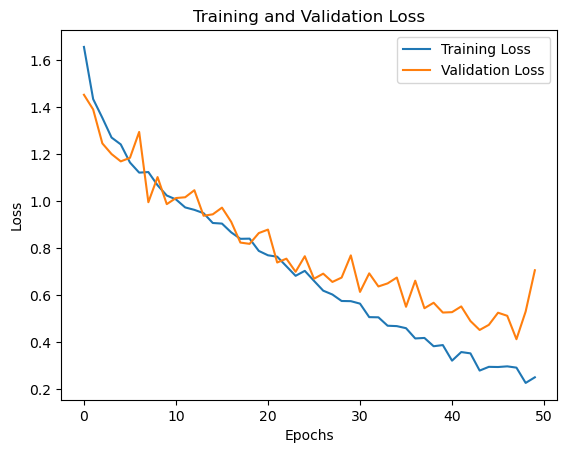

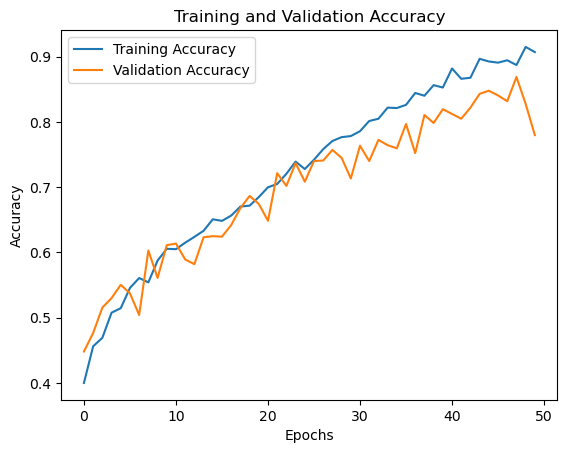

In [38]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [39]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)



39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


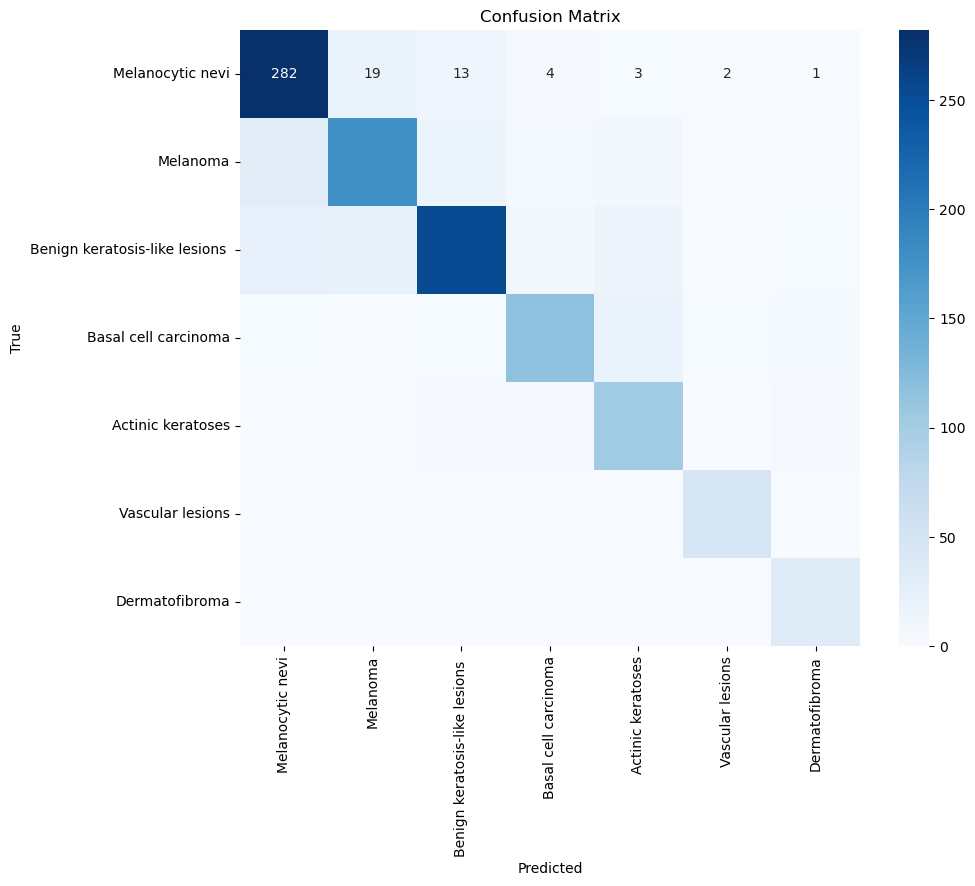

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=lesion_names, yticklabels=lesion_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


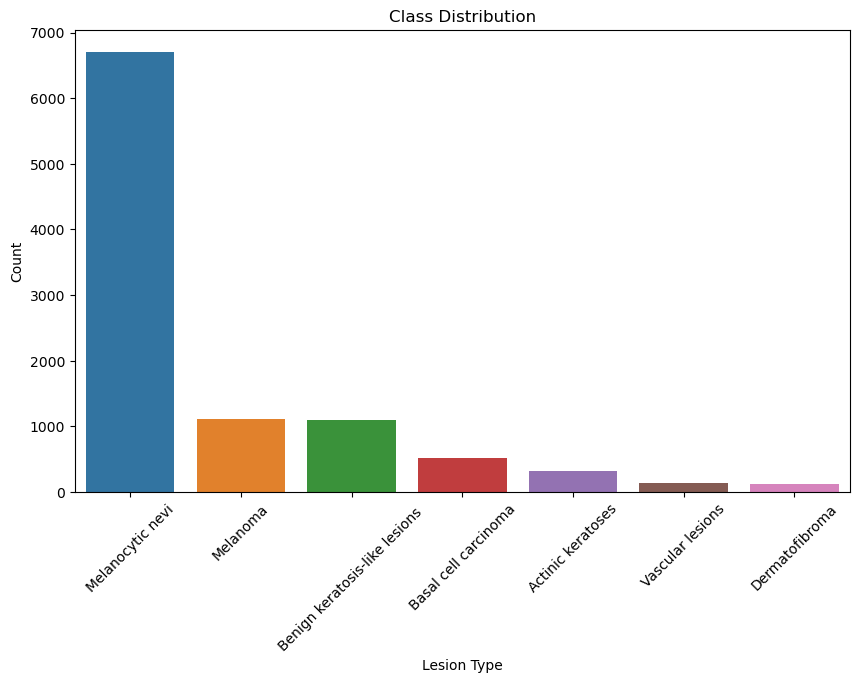

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='lesion_type', data=df, order=df['lesion_type'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [42]:
# Predict probabilities for each class
sample_predictions_prob = model.predict(sample_images)

# Convert probabilities to class labels
sample_predictions = np.argmax(sample_predictions_prob, axis=1)

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title(f'Actual: {lesion_names[sample_labels[i]]}\nPredicted: {lesion_names[sample_predictions[i]]}')
    plt.axis('off')
plt.show()


NameError: name 'sample_images' is not defined